# **Detect spam emails using Naive Bayes**

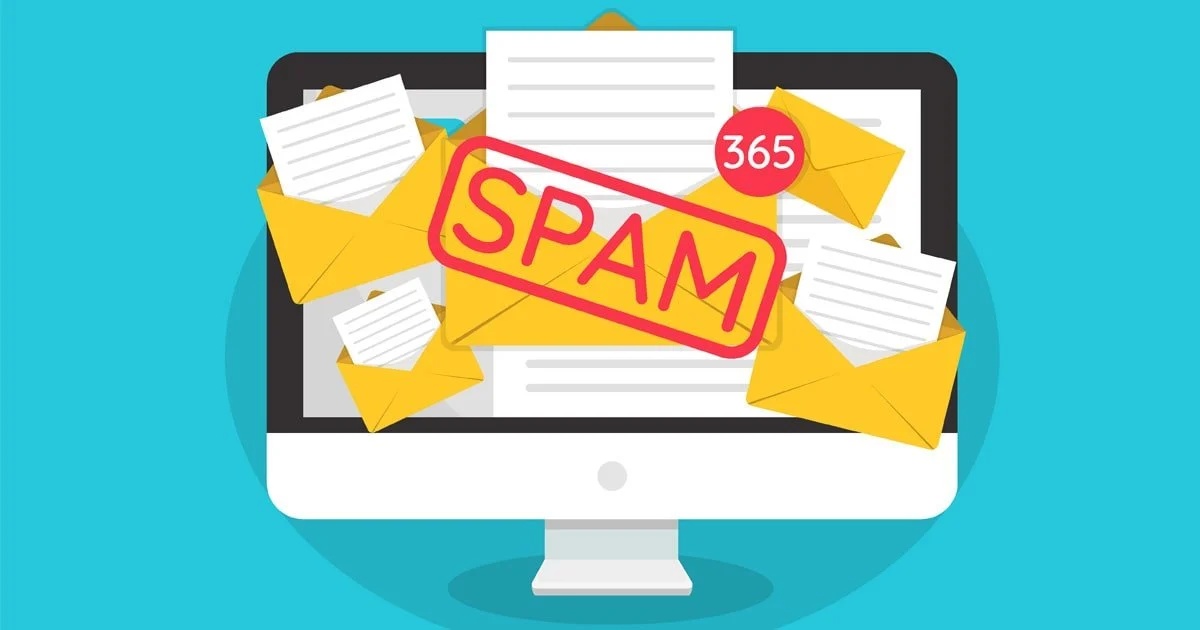

# **Problem statement**

- The Emails Spam Collection is a set of Emails tagged messages that have been collected for Emails Spam research. It contains one set of Emails messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

# **1-Import Liberaries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# **2-Upload dataset**

In [ ]:
df=pd.read_csv('/content/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
#To get to know the samples count and know more about dataset (other values isn't important because we don't have continouse output  )
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
#no null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# **3-Visualize the data**

In [ ]:
#unspammed emails
ham=df[df['spam']==0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
#spammed emails
spam=df[df['spam']==1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [ ]:
#spam percentatge 
print('spam percentage=',(len(spam)/len(df))*100,'%')

spam percentage= 23.88268156424581 %


In [ ]:
#ham percentage
print('Ham percentage=',(len(ham)/len(df))*100,'%')

Ham percentage= 76.11731843575419 %


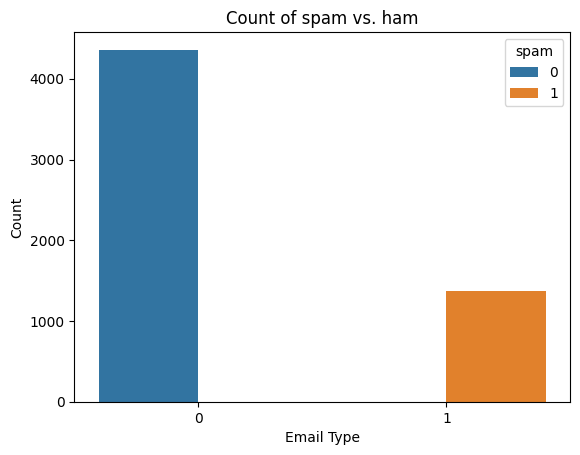

In [ ]:
sns.countplot(data=df, x='spam', hue='spam')
plt.ylabel('Count')
plt.xlabel('Email Type')
plt.title('Count of spam vs. ham')
plt.show()

# **4-Count vectorizer**

In [ ]:
vectorizer =CountVectorizer()
spamham_countvectorizer=vectorizer.fit_transform(df['text'])

In [ ]:
feature_names1 = vectorizer.get_feature_names_out()
feature_names1

array(['00', '000', '0000', ..., 'zzn', 'zzncacst', 'zzzz'], dtype=object)

In [ ]:
 print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
 spamham_countvectorizer.shape

(5728, 37303)

# **5-TRAIN THE MODEL**

Train sample model

In [ ]:
labels=df['spam'].values
labels

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
 nb=MultinomialNB() 
 nb.fit(spamham_countvectorizer,labels)


MultinomialNB()

In [ ]:
test=['free money!!','Hi Aly we would like to talk on whatsapp']
test_countvectorizer=vectorizer.transform(test)

In [ ]:
test_predict=nb.predict(test_countvectorizer)
test_predict

array([1, 0])

# **6-Split the data into training and testing**

In [ ]:
x=spamham_countvectorizer
y=labels

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
nb= MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

# **7-Evaluate the model**

In [ ]:
y_predict_train=nb.predict(x_train)
y_predict_train

array([0, 0, 1, ..., 0, 0, 1])

<Axes: >

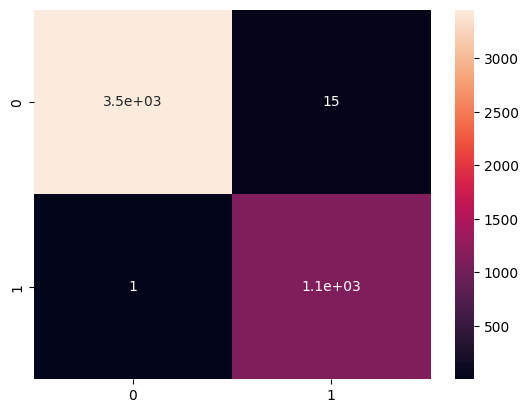

In [ ]:
cm=confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm,annot=True)

In [ ]:
y_predict_test=nb.predict(x_test)
y_predict_test

array([1, 1, 0, ..., 0, 1, 0])

<Axes: >

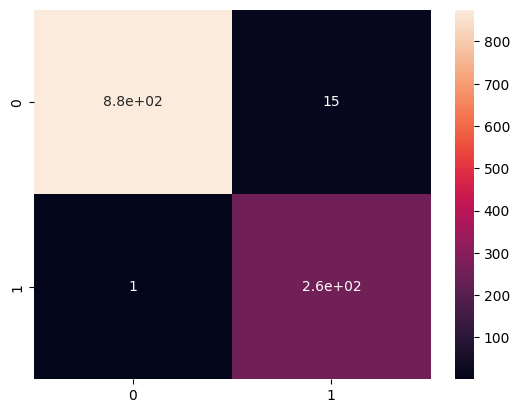

In [ ]:
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [ ]:
 print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       890
           1       0.94      1.00      0.97       256

    accuracy                           0.99      1146
   macro avg       0.97      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



# **THANK YOU**